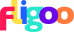

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**

#### Part 1
During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
  - **Expected**:
    - Make at least 10 plots with any ploting library (plotly, matplotlib, seaborn, etc.)
    - Write down the conclusions, in a clear manner, of every plot in this notebook

#### Part 2
In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - **Feature extraction:** Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
      - **Expected**:
        - Create **one** scikit-learn pipeline inside a file called `pipelines.py`
        - Create at least **three** scikit-learn transformers inside a file called `transformers.py` and use them inside the pipeline from previous step. This transformers should add new features or clean the original dataframe of this take-home
          - Feature example: Compute "total_nights" feature. This is the sum of `stays_in_week_nights` + `stays_in_weekend_nights`
          - Cleaning example: Transform string values. `'0'` to int type `0` 
        - Import pipeline and run the transformations inside this notebook

  - **Machine Learning modeling:** Fit models with the given data. Pay attention to the entire process to avoid missing any crucial step. You could use the `children` column as target.
    - **Expected**:
      - Use the dataset with the new features generated to train *at least* **three** different machine learning models and generate metrics about their performance.
    
#### Part 3
Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  - **Expected**:
    - Create a summary of all the findings in part 1
    - Create an explanation of the features added in part 2
    - Create a summary of the model metrics
    - These explanations should be at high level and understood by a non-technical person
    - You can add all the summaries and explanations at the end of this notebook, it can be done in markdown format or any other external resource like a ppt presentation, pdf document, etc. Whatever works best for you!

 
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Virtualenv, requirements or Conda environment for isolation.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- Shap Model explanability: explain feature importance with the use of shapley values

## Part I - Exploratory Data Analisys

In [1]:
import requests

# URL of the dataset
url = 'https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the response to a local file
    with open('hotels.csv', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully")
else:
    print("Failed to download the file. Status code:", response.status_code)


File downloaded successfully


In [2]:
dtype_dict = {
    'hotel': 'str',
    'lead_time': 'int64',
    'stays_in_weekend_nights': 'int64',
    'stays_in_week_nights': 'int64',
    'adults': 'int64',
    'children': 'str',
    'meal': 'str',
    'country': 'str',
    'market_segment': 'str',
    'distribution_channel': 'str',
    'is_repeated_guest': 'int64',
    'previous_cancellations': 'int64',
    'previous_bookings_not_canceled': 'int64',
    'reserved_room_type': 'str',
    'assigned_room_type': 'str',
    'booking_changes': 'int64',
    'deposit_type': 'str',
    'days_in_waiting_list': 'int64',
    'customer_type': 'str',
    'average_daily_rate': 'float64',
    'required_car_parking_spaces': 'str',  
    'total_of_special_requests': 'int64',
    'arrival_date': 'str'
}



In [4]:
import pandas as pd
import numpy as np
from random import randrange
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 50)


hotels_df = pd.read_csv('hotels.csv', dtype=dtype_dict)


# Replace 'none' with NaN across the entire DataFrame
hotels_df = hotels_df.replace('none', np.nan)
hotels_df.loc[:, "children"] = hotels_df.loc[:, "children"].fillna("no children")


In [6]:
hotels_df

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,City_Hotel,217,1,3,2,no children,BB,DEU,Offline_TA/TO,TA/TO,0,0,0,A,A,0,No_Deposit,0,Transient-Party,80.75,NaN,1,2016-09-01
1,City_Hotel,2,0,1,2,no children,BB,PRT,Direct,Direct,0,0,0,D,K,0,No_Deposit,0,Transient,170.00,NaN,3,2017-08-25
2,Resort_Hotel,95,2,5,2,no children,BB,GBR,Online_TA,TA/TO,0,0,0,A,A,2,No_Deposit,0,Transient,8.00,NaN,2,2016-11-19
3,Resort_Hotel,143,2,6,2,no children,HB,ROU,Online_TA,TA/TO,0,0,0,A,A,0,No_Deposit,0,Transient,81.00,NaN,1,2016-04-26
4,Resort_Hotel,136,1,4,2,no children,HB,PRT,Direct,Direct,0,0,0,F,F,0,No_Deposit,0,Transient,157.60,NaN,4,2016-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Resort_Hotel,172,0,2,2,children,BB,PRT,Direct,Direct,0,0,0,A,A,1,No_Deposit,0,Transient,73.39,NaN,1,2016-10-07
49996,Resort_Hotel,48,0,4,2,no children,FB,PRT,Direct,Direct,0,0,0,A,B,2,No_Deposit,0,Transient,158.00,NaN,0,2015-09-01
49997,City_Hotel,155,0,4,2,no children,BB,DEU,Offline_TA/TO,TA/TO,0,0,0,A,A,0,No_Deposit,0,Transient,82.50,NaN,1,2017-07-26
49998,Resort_Hotel,140,2,5,2,no children,HB,GBR,Direct,Direct,0,0,0,G,G,0,No_Deposit,0,Transient,143.00,NaN,0,2016-04-28


| Column Name                     | Column Type     | Description                                                                                                                     |
|---------------------------------|-----------------|---------------------------------------------------------------------------------------------------------------------------------|
| hotel                           | str             | Hotel type (resort or city)                                                                                                     |
| lead_time                       | int64           | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date                           |
| stays_in_weekend_nights         | int64           | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                   |
| stays_in_week_nights            | int64           | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                                        |
| adults                          | int64           | Number of adults                                                                                                                 |
| children                        | float64         | Number of children (sum of both payable and non-payable children)                                                               |
| meal                            | str             | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
| country                         | str             | Country of origin, represented in the ISO 3155-3:2013 format                                                                    |
| market_segment                  | str             | Market segment designation, where "TA" means "Travel Agents" and "TO" means "Tour Operators": <br> Direct; <br> Corporate; <br> Online TA; <br> Offline TA/TO; <br> Complementary; <br> Groups; <br> Undefined; <br> Aviation                                    |
| distribution_channel            | str             | Booking distribution channel, where "TA" means "Travel Agents" and "TO" means "Tour Operators": <br> Direct; <br> Corporate; <br> TA/TO; <br> GDS; <br> Undefined                                  |
| is_repeated_guest               | int64           | Value indicating if the booking name was from a repeated guest (1) or not (0)                                                   |
| previous_cancellations          | int64           | Number of previous bookings that were cancelled by the customer prior to the current booking                                    |
| previous_bookings_not_canceled  | int64           | Number of previous bookings not cancelled by the customer prior to the current booking                                          |
| reserved_room_type              | str             | Code of room type reserved (presented instead of designation for anonymity reasons): <br> From A to K                                   |
| assigned_room_type              | str             | Code for the type of room assigned to the booking (can differ from the reserved room type due to operational reasons): <br>  From A to K            |
| booking_changes                 | int64           | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until check-in or cancellation |
| deposit_type                    | str             | Indication of whether the customer made a deposit to guarantee the booking, with three categories: <br> No Deposit; <br> Non Refund; <br> Refundable |
| days_in_waiting_list            | int64           | Number of days the booking was in the waiting list before it was confirmed to the customer                                       |
| customer_type                   | str             | Type of booking: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking                                                                    |
| average_daily_rate              | float64         | Average Daily Rate, calculated by dividing the sum of all lodging transactions by the total number of staying nights            |
| required_car_parking_spaces     | float64         | Number of car parking spaces required by the customer                                                                           |
| total_of_special_requests       | int64           | Number of special requests made by the customer (e.g., twin bed or high floor)                                                  |
| arrival_date                    | str             | Arrival date in string format                                                                                                   |


## First sanity check
***

In [7]:
# Display basic information about the dataset
print(hotels_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   lead_time                       50000 non-null  int64  
 2   stays_in_weekend_nights         50000 non-null  int64  
 3   stays_in_week_nights            50000 non-null  int64  
 4   adults                          50000 non-null  int64  
 5   children                        50000 non-null  object 
 6   meal                            50000 non-null  object 
 7   country                         49711 non-null  object 
 8   market_segment                  50000 non-null  object 
 9   distribution_channel            50000 non-null  object 
 10  is_repeated_guest               50000 non-null  int64  
 11  previous_cancellations          50000 non-null  int64  
 12  previous_bookings_not_canceled  

In [8]:
# Check for missing values
missing_values = hotels_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 hotel                                 0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                             289
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
days_in_waiting_list                  0
customer_type                         0
average_daily_rate                    0
required_car_parking_spaces       45019
total_of_special_requests             0
arrival_date                          0
dtype: int64


In [9]:
# Check for duplicate rows
duplicate_rows = hotels_df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

Duplicate rows: 6615


In [10]:
# Check if duplicate rows affect the target
hotels_df.loc[hotels_df.duplicated()].children.value_counts()

children
no children    6576
children         39
Name: count, dtype: int64

In [11]:
# Check for unique values in each column
unique_values = hotels_df.nunique()
print("Unique values per column:\n")
unique_values

Unique values per column:



hotel                                2
lead_time                          414
stays_in_weekend_nights             17
stays_in_week_nights                31
adults                               5
children                             2
meal                                 5
country                            154
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations               9
previous_bookings_not_canceled      57
reserved_room_type                   9
assigned_room_type                  10
booking_changes                     19
deposit_type                         3
days_in_waiting_list                92
customer_type                        4
average_daily_rate                6173
required_car_parking_spaces          1
total_of_special_requests            6
arrival_date                       793
dtype: int64

In [12]:
# Check data types of each column
data_types = hotels_df.dtypes
print("Data types:\n", )
data_types

Data types:



hotel                              object
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
average_daily_rate                float64
required_car_parking_spaces        object
total_of_special_requests           int64
arrival_date                       object
dtype: object

In [13]:
# Summary statistics of numerical columns
summary_stats = hotels_df.describe()
print("Summary statistics:\n")
summary_stats

Summary statistics:



,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000
mean,80.094120,0.928520,2.464540,1.830280,0.043200,0.016740,0.202740,0.294960,1.5704,99.942342,0.712660
std,91.201362,0.996288,1.936176,0.509078,0.203309,0.287857,1.803691,0.740006,14.7903,49.039092,0.833804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,-6.380000,0.000000
25%,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,67.500000,0.000000
50%,45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,92.500000,1.000000
75%,125.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,125.000000,1.000000
max,709.000000,19.000000,50.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.0000,510.000000,5.000000


In [14]:
# Check for invalid values or outliers in numerical columns
outliers = hotels_df.describe(percentiles=[.01, .05, .95, .99])
print("Outliers check:\n")

outliers

Outliers check:



,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000
mean,80.094120,0.928520,2.464540,1.830280,0.043200,0.016740,0.202740,0.294960,1.5704,99.942342,0.712660
std,91.201362,0.996288,1.936176,0.509078,0.203309,0.287857,1.803691,0.740006,14.7903,49.039092,0.833804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,-6.380000,0.000000
1%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,35.000000,0.000000
50%,45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,92.500000,1.000000
95%,269.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.0000,191.000000,2.000000
99%,386.000000,4.000000,10.000000,3.000000,1.000000,0.000000,5.000000,3.000000,58.0000,250.752100,3.000000
max,709.000000,19.000000,50.000000,4.000000,1.000000,13.000000,72.000000,21.000000,379.0000,510.000000,5.000000


In [15]:
#Get the realy data type for each column 
for col in hotels_df.columns:
    number_random = randrange(50000)
    obj = hotels_df.loc[number_random, col]
    print(f"{col}: {type(obj)}")


hotel: <class 'str'>
lead_time: <class 'numpy.int64'>
stays_in_weekend_nights: <class 'numpy.int64'>
stays_in_week_nights: <class 'numpy.int64'>
adults: <class 'numpy.int64'>
children: <class 'str'>
meal: <class 'str'>
country: <class 'str'>
market_segment: <class 'str'>
distribution_channel: <class 'str'>
is_repeated_guest: <class 'numpy.int64'>
previous_cancellations: <class 'numpy.int64'>
previous_bookings_not_canceled: <class 'numpy.int64'>
reserved_room_type: <class 'str'>
assigned_room_type: <class 'str'>
booking_changes: <class 'numpy.int64'>
deposit_type: <class 'str'>
days_in_waiting_list: <class 'numpy.int64'>
customer_type: <class 'str'>
average_daily_rate: <class 'numpy.float64'>
required_car_parking_spaces: <class 'float'>
total_of_special_requests: <class 'numpy.int64'>
arrival_date: <class 'str'>


## EDA: exploratory data analysis
***

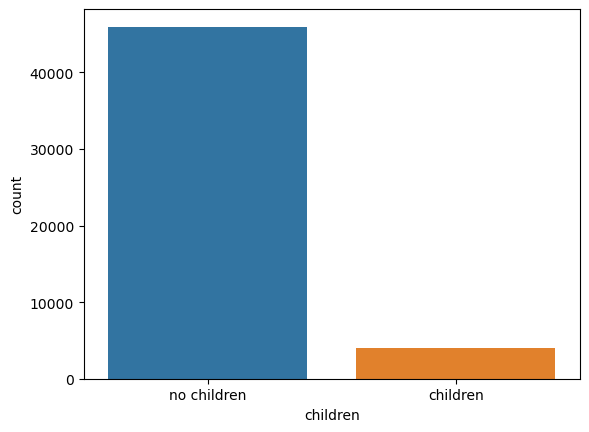

In [16]:
#first understand the distribution of the target (children)

sns.countplot(x='children', data=hotels_df)
plt.show()


#### 1. **Correlation between Lead Time and Number of Children:** ❌

* **Idea:** Investigate if there's a correlation between the lead time (the number of days between booking and arrival) and the presence of children in the booking.
* **Insight:** Families with children might book their stays further in advance compared to bookings without children.
* **Conclusion:** The analysis indicates a slight tendency for families with children to book their stays earlier. However, the correlation is weak, suggesting that while there may be a mild preference for advance booking among families, other factors likely play a more significant role in determining lead time.

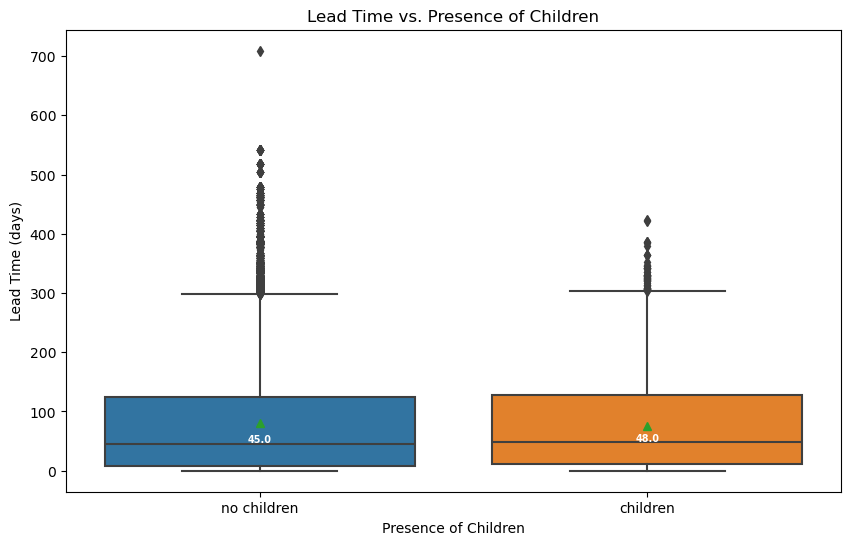

In [17]:
# 1. Correlation between Lead Time and Number of Children
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='children', y='lead_time', data=hotels_df, showmeans=True)
plt.title('Lead Time vs. Presence of Children')
plt.xlabel('Presence of Children')
plt.ylabel('Lead Time (days)')

medians = hotels_df.groupby(['children'])['lead_time'].median()
vertical_offset = hotels_df['lead_time'].median() * 0.05 

for xtick in box_plot.get_xticklabels():
    box_plot.text(xtick.get_position()[0], medians[xtick.get_text()] + vertical_offset, medians[xtick.get_text()], 
                  horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.show()


#### 2. **Impact of Room Types on Bookings with Children:** ✅
   - **Idea:** Analyze the relationship between the reserved and assigned room types and whether the booking includes children.
   - **Insight:** Certain room types might be more popular among families with children, indicating a preference for larger or more child-friendly accommodations.
   - **Conclusion:** The analysis reveals a notable preference among families with children for specific room types, suggesting they tend to choose larger or more child-friendly accommodations. However, it was also observed that families are often assigned different room types upon arrival compared to what they initially reserved. This discrepancy indicates that while reservations reflect the preferred choices of families with children, the final room assignments may not always align with these preferences. Consequently, it is important for hotels to consider both the reserved and assigned room types to better understand and cater to the needs of families.


 **reserved_room_type**


In [18]:
string_list = [chr(i) for i in range(ord('A'), ord('M'))]
print(string_list)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


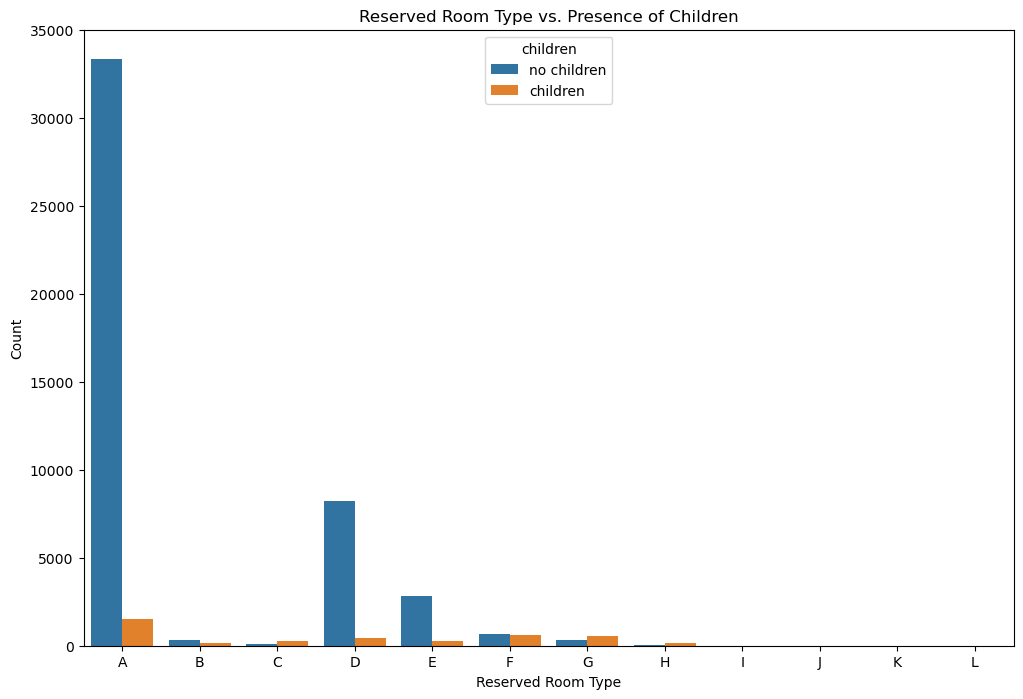

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='reserved_room_type', hue='children', data=hotels_df, order=string_list)
plt.title('Reserved Room Type vs. Presence of Children')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.show()

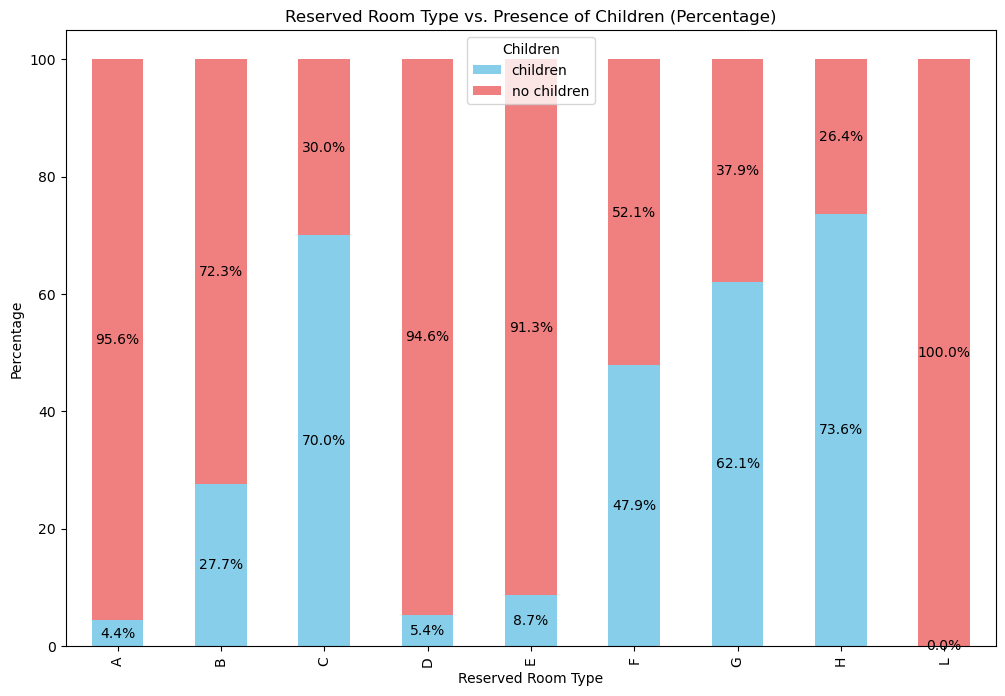

In [20]:
# Calculate the percentage of bookings with and without children for each reserved_room_type
reserved_room_type_counts = hotels_df.groupby(['reserved_room_type', 'children']).size().unstack(fill_value=0)
reserved_room_type_percentages = reserved_room_type_counts.div(reserved_room_type_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
reserved_room_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightcoral'])

# Add values on top of bars
for n, x in enumerate([*reserved_room_type_percentages.index.values]):
    for (proportion, y_loc) in zip(reserved_room_type_percentages.loc[x], reserved_room_type_percentages.loc[x].cumsum()):
        plt.text(n, y_loc - (proportion / 2), f'{proportion:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.title('Reserved Room Type vs. Presence of Children (Percentage)')
plt.xlabel('Reserved Room Type')
plt.ylabel('Percentage')
plt.legend(title='Children')
plt.show()

**assigned_room_type**

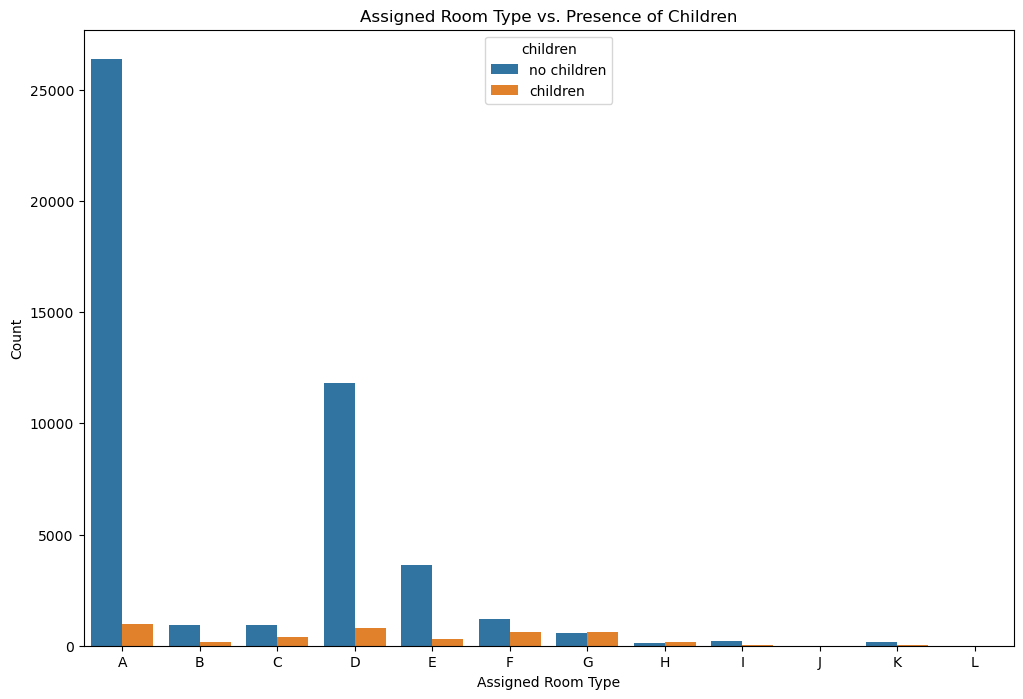

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x='assigned_room_type', hue='children', data=hotels_df, order=string_list)
plt.title('Assigned Room Type vs. Presence of Children')
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.show()


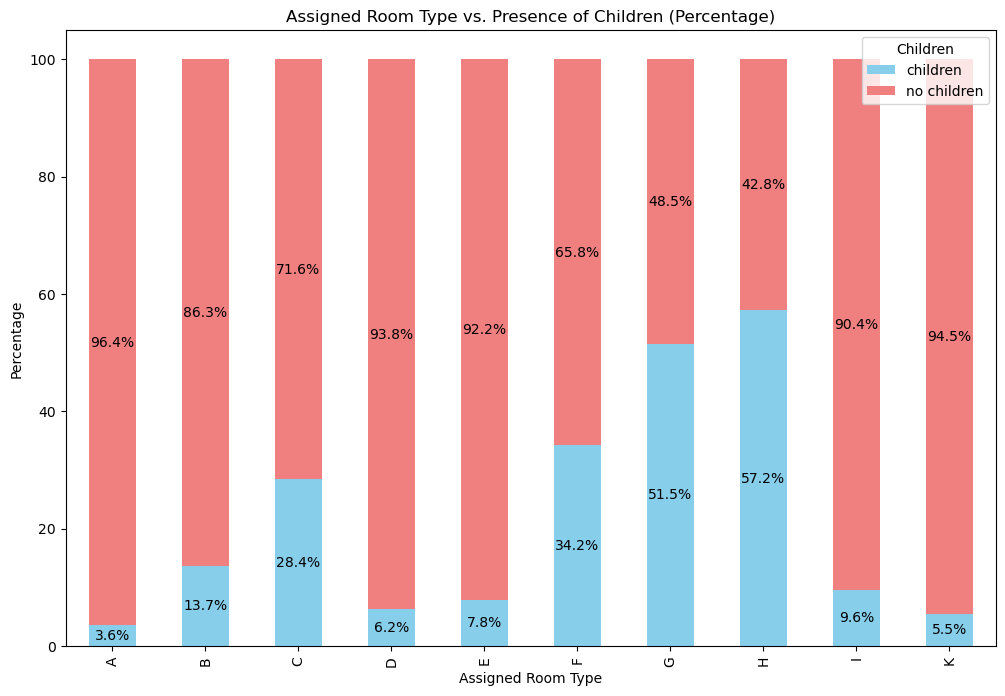

In [22]:
# Calculate the percentage of bookings with and without children for each reserved_room_type
reserved_room_type_counts = hotels_df.groupby(['assigned_room_type', 'children']).size().unstack(fill_value=0)
reserved_room_type_percentages = reserved_room_type_counts.div(reserved_room_type_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
reserved_room_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightcoral'])

# Add values on top of bars
for n, x in enumerate([*reserved_room_type_percentages.index.values]):
    for (proportion, y_loc) in zip(reserved_room_type_percentages.loc[x], reserved_room_type_percentages.loc[x].cumsum()):
        plt.text(n, y_loc - (proportion / 2), f'{proportion:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.title('Assigned Room Type vs. Presence of Children (Percentage)')
plt.xlabel('Assigned Room Type')
plt.ylabel('Percentage')
plt.legend(title='Children')
plt.show()

/tmp/ipykernel_1471/1255977246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_df_with_children['room_type_changed'] = hotels_df_with_children['reserved_room_type'] != hotels_df_with_children['assigned_room_type']


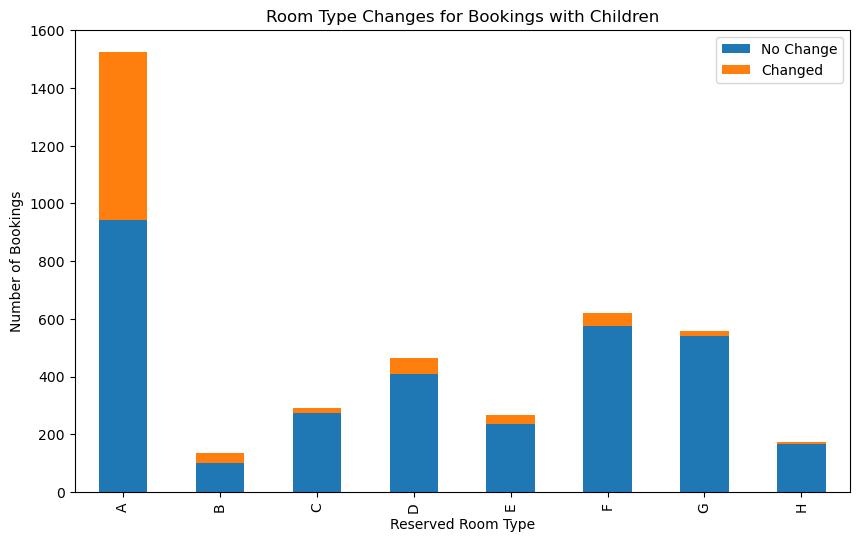

In [23]:
hotels_df_with_children = hotels_df.query("children == 'children'", engine='python')

# Create a column to indicate if the room type was changed
hotels_df_with_children['room_type_changed'] = hotels_df_with_children['reserved_room_type'] != hotels_df_with_children['assigned_room_type']

# Count the number of changes per reserved room type
change_counts = hotels_df_with_children.groupby(['reserved_room_type', 'room_type_changed']).size().unstack(fill_value=0)

# Plotting
change_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Room Type Changes for Bookings with Children')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.legend(['No Change', 'Changed'])
plt.show()


/tmp/ipykernel_1471/2575958365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_df_with_children['room_type_changed'] = hotels_df_with_children['reserved_room_type'] != hotels_df_with_children['assigned_room_type']


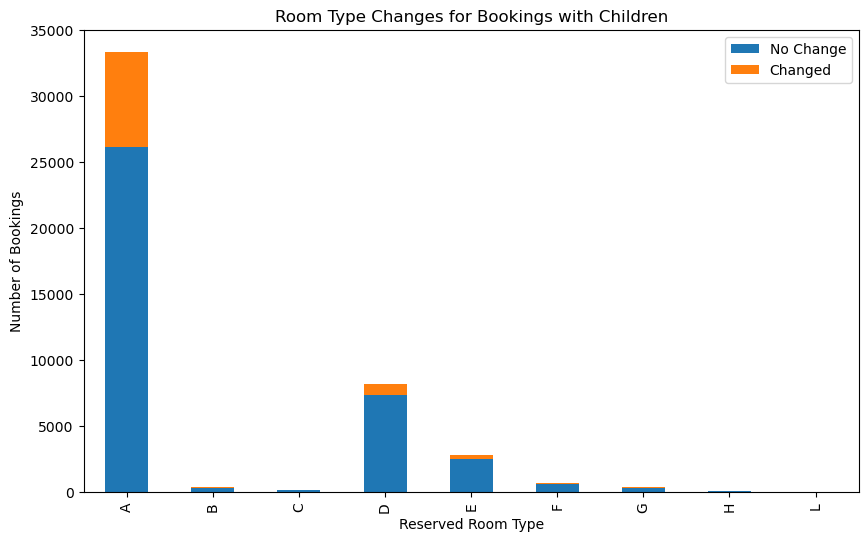

In [24]:
hotels_df_with_children = hotels_df.query("children != 'children'", engine='python')

# Create a column to indicate if the room type was changed
hotels_df_with_children['room_type_changed'] = hotels_df_with_children['reserved_room_type'] != hotels_df_with_children['assigned_room_type']

# Count the number of changes per reserved room type
change_counts = hotels_df_with_children.groupby(['reserved_room_type', 'room_type_changed']).size().unstack(fill_value=0)

# Plotting
change_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Room Type Changes for Bookings with Children')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.legend(['No Change', 'Changed'])
plt.show()




#### 3. **Distribution Channel Preferences for Families:**
   - **Idea:** Examine which distribution channels (e.g., direct bookings, travel agents, online travel agents) are more frequently used by bookings with children.
   - **Insight:** Families might prefer certain booking channels that offer better family packages or more flexible booking options.
   - **Conclusion:**


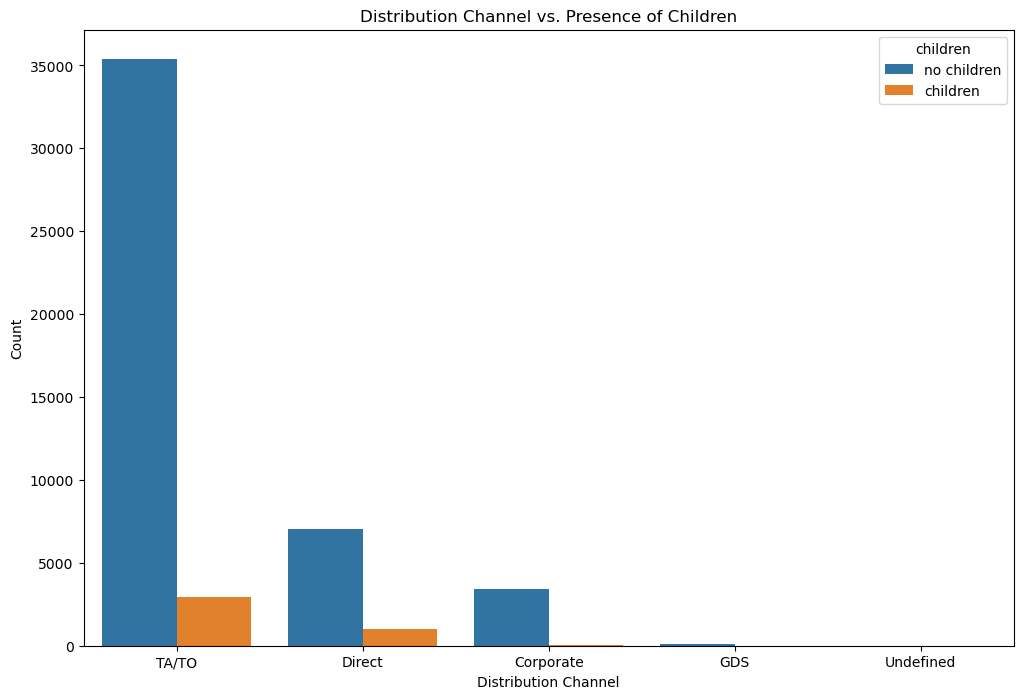

In [25]:
# 3. Distribution Channel Preferences for Families
plt.figure(figsize=(12, 8))
sns.countplot(x='distribution_channel', hue='children', data=hotels_df)
plt.title('Distribution Channel vs. Presence of Children')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.show()


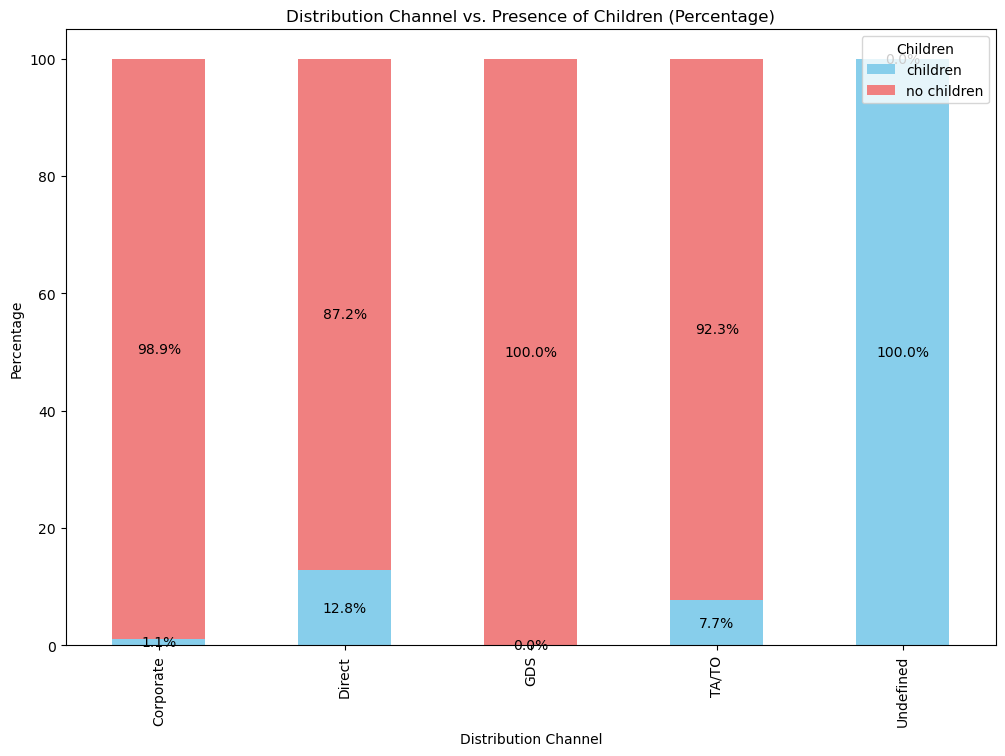

In [26]:
# Calculate the percentage of bookings with and without children for each reserved_room_type
reserved_room_type_counts = hotels_df.groupby(['distribution_channel', 'children']).size().unstack(fill_value=0)
reserved_room_type_percentages = reserved_room_type_counts.div(reserved_room_type_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
reserved_room_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightcoral'])

# Add values on top of bars
for n, x in enumerate([*reserved_room_type_percentages.index.values]):
    for (proportion, y_loc) in zip(reserved_room_type_percentages.loc[x], reserved_room_type_percentages.loc[x].cumsum()):
        plt.text(n, y_loc - (proportion / 2), f'{proportion:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.title('Distribution Channel vs. Presence of Children (Percentage)')
plt.xlabel('Distribution Channel')
plt.ylabel('Percentage')
plt.legend(title='Children')
plt.show()

#### 4. **Effect of Special Requests on Bookings with Children:** ✅
   - **Idea:** Look into the number and type of special requests made by bookings with children compared to those without.
   - **Insight:** Families with children might have more special requests, such as cribs, extra beds, or specific room locations (e.g., away from noise).
   - **Conclusion:** The analysis confirms that families with children tend to make more special requests on average compared to those without children. This highlights the importance for hotels to be prepared for and responsive to the specific needs of families to enhance their overall experience. 


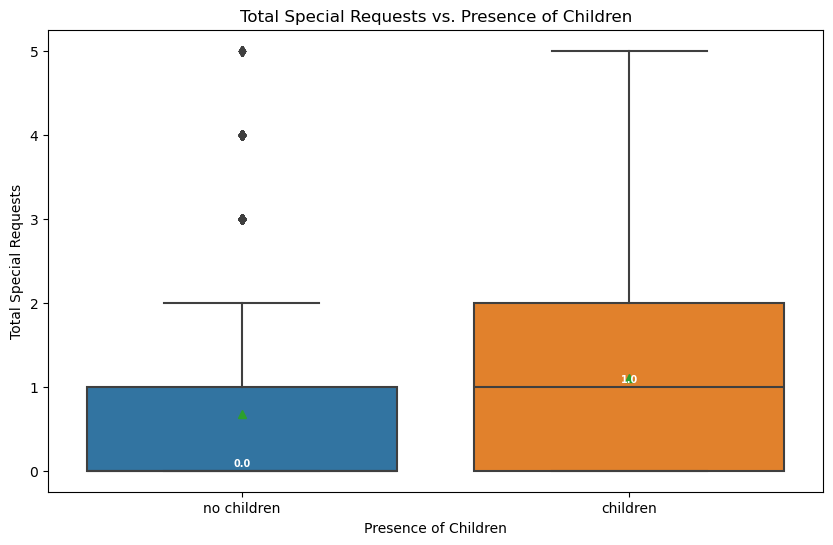

In [27]:
# 4. Effect of Special Requests on Bookings with Children
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='children', y='total_of_special_requests', data=hotels_df, showmeans=True)
plt.title('Total Special Requests vs. Presence of Children')
plt.xlabel('Presence of Children')
plt.ylabel('Total Special Requests')

medians = hotels_df.groupby(['children'])['total_of_special_requests'].median()
vertical_offset = hotels_df['total_of_special_requests'].median() * 0.05

for xtick in box_plot.get_xticklabels():
    box_plot.text(xtick.get_position()[0], medians[xtick.get_text()] + vertical_offset, medians[xtick.get_text()], 
                  horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.show()



#### 5. **Average Daily Rate and Bookings with Children:** ✅
   - **Idea:** Investigate if there's a difference in the average daily rate for bookings that include children versus those that do not.
   - **Insight:** Bookings with children might have higher average daily rates due to the need for larger rooms, additional services, or packages tailored for families.
   - **Conclusion:** The analysis clearly shows that the average daily rate is significantly higher for bookings that include children.



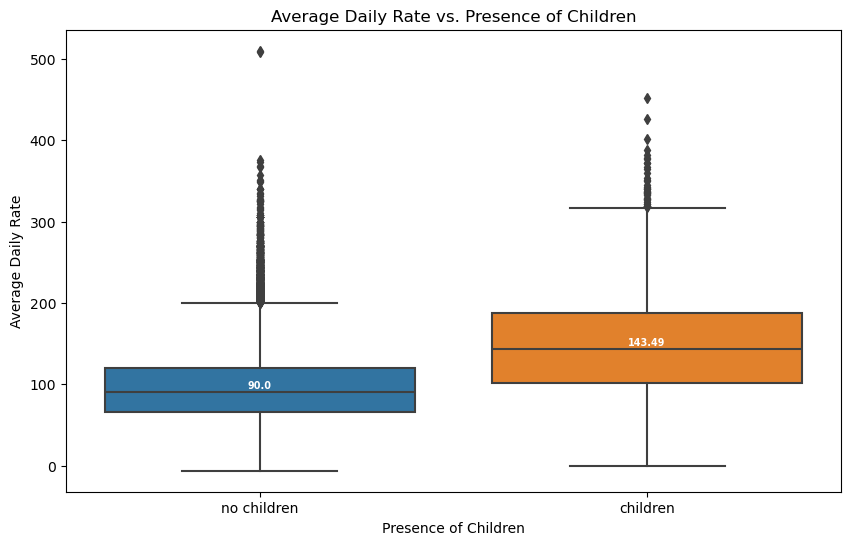

In [28]:
# Average Daily Rate and Bookings with Children
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='children', y='average_daily_rate', data=hotels_df)
plt.title('Average Daily Rate vs. Presence of Children')
plt.xlabel('Presence of Children')
plt.ylabel('Average Daily Rate')

medians = hotels_df.groupby(['children'])['average_daily_rate'].median()
vertical_offset = hotels_df['average_daily_rate'].median() * 0.05

for xtick in box_plot.get_xticklabels():
    box_plot.text(xtick.get_position()[0], medians[xtick.get_text()] + vertical_offset, medians[xtick.get_text()], 
                  horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.show()

#### 6. **Booking Changes and Presence of Children:** ❌

   - **Idea:** Investigate the relationship between the number of booking changes and whether the booking includes children.
   - **Insight:** Families with children might be more likely to make changes to their bookings, possibly due to changing travel plans or specific needs that arise closer to the travel date.
   - **Conclusion:** While the data indicates that families with children tend to make more changes to their bookings on average, the difference is not statistically significant. This suggests that, although families with children may have a slightly higher tendency to alter their bookings, the variation is not substantial enough to draw definitive conclusions.


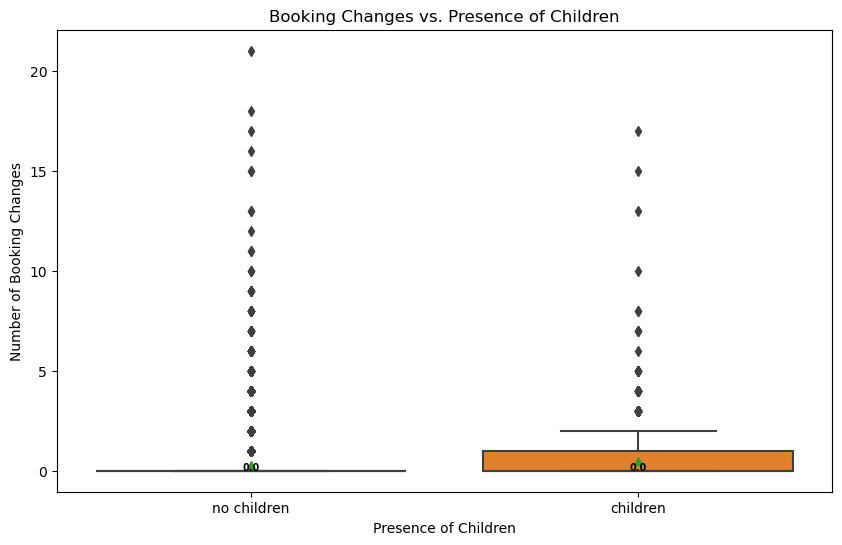

In [29]:
# Booking Changes and Presence of Children


plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='children', y='booking_changes', data=hotels_df, showmeans=True)
plt.title('Booking Changes vs. Presence of Children')
plt.xlabel('Presence of Children')
plt.ylabel('Number of Booking Changes')

medians = hotels_df.groupby(['children'])['booking_changes'].median()
vertical_offset = hotels_df['booking_changes'].median() * 0.


for xtick in box_plot.get_xticklabels():
    box_plot.text(xtick.get_position()[0], medians[xtick.get_text()] + vertical_offset, medians[xtick.get_text()], 
                  horizontalalignment='center', size='x-small', color='black', weight='semibold')

plt.show()


#### 7. **Customer Type and Family Bookings:** ❌

   - **Idea:** Analyze the relationship between the customer type (Contract, Group, Transient, Transient-party) and the presence of children.
   - **Insight:** Certain customer types, such as Transient-party or Group, might have a higher likelihood of including children, which can inform how different customer segments are managed and catered to.
   - **Conclusion:** The data indicates that the distribution of customer types is similar for bookings with and without children. This suggests that the presence of children does not significantly influence the customer type, implying that families with children are just as likely to be Transient, Group, Contract, or Transient-party customers as those without children.
     

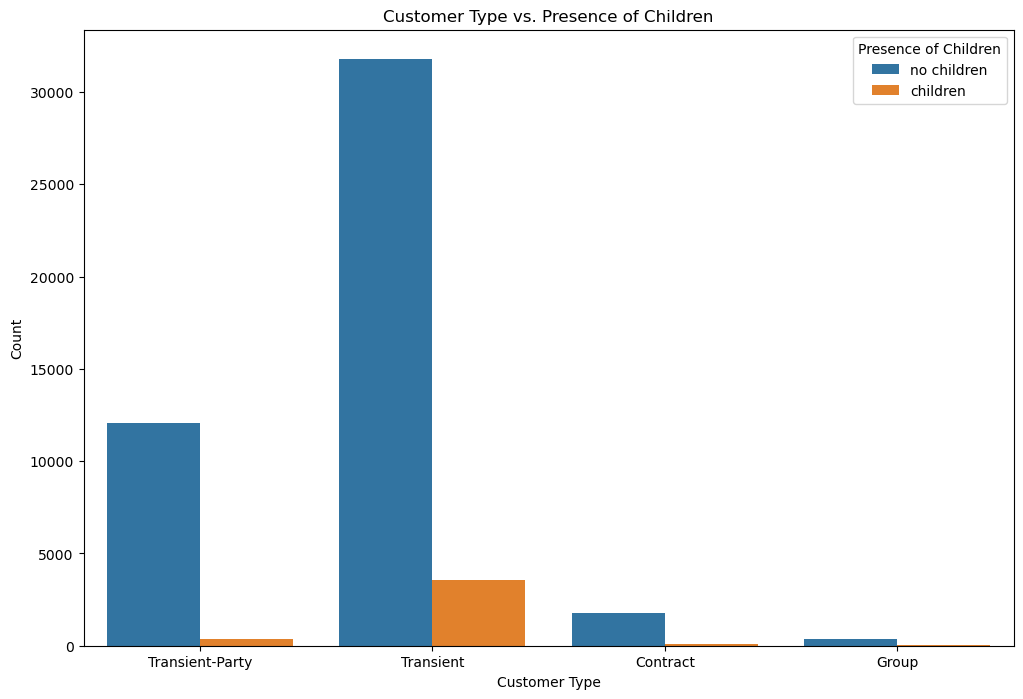

In [30]:
# Customer Type and Family Bookings
plt.figure(figsize=(12, 8))
sns.countplot(x='customer_type', hue='children', data=hotels_df)
plt.title('Customer Type vs. Presence of Children')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Presence of Children')
plt.show()


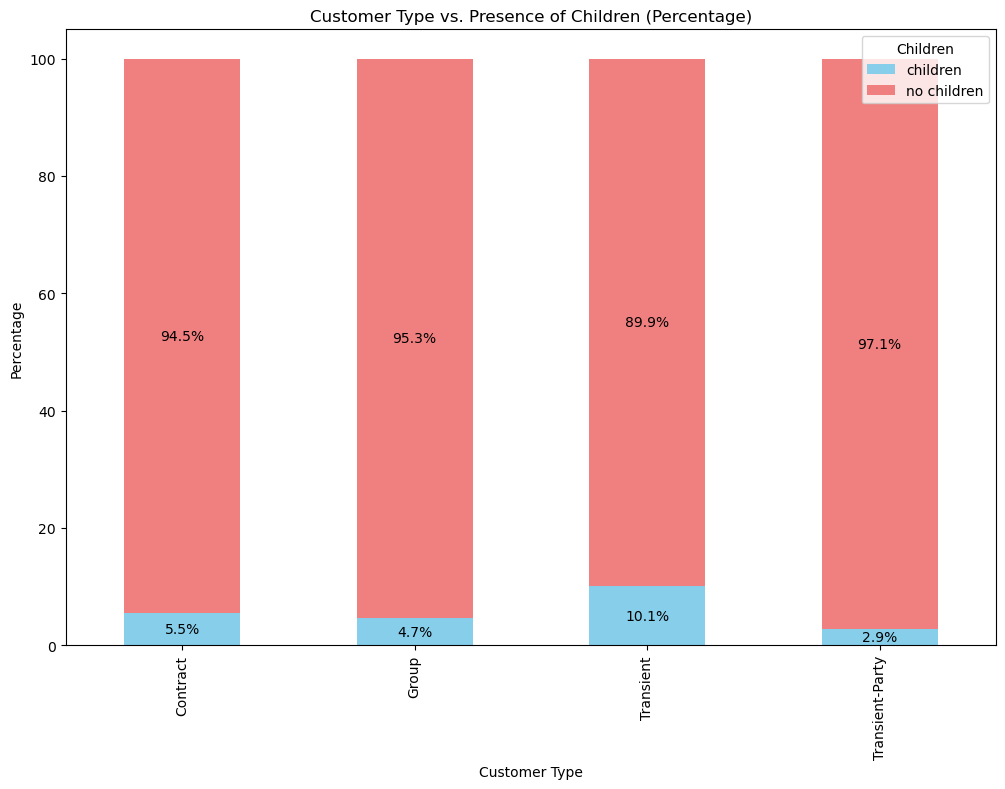

In [31]:
# Calculate the percentage of bookings with and without children for each customer type
customer_type_counts = hotels_df.groupby(['customer_type', 'children']).size().unstack(fill_value=0)
customer_type_percentages = customer_type_counts.div(customer_type_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
customer_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightcoral'])

# Add values on top of bars
for n, x in enumerate([*customer_type_percentages.index.values]):
    for (proportion, y_loc) in zip(customer_type_percentages.loc[x], customer_type_percentages.loc[x].cumsum()):
        plt.text(n, y_loc - (proportion / 2), f'{proportion:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.title('Customer Type vs. Presence of Children (Percentage)')
plt.xlabel('Customer Type')
plt.ylabel('Percentage')
plt.legend(title='Children')
plt.show()


## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In [32]:
#
# Develop Machine/Statistical Learning models to predict the target variable...
#

In [33]:
from sklearn.ensemble import RandomForestRegressor


from pipelines import create_pipeline

# Define preprocessing for numerical features
numeric_features = hotels_df.select_dtypes(include=['int', 'float']).columns

model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = create_pipeline(numeric_features, model)

In [34]:
pipeline

Pipeline(steps=[('add_total_nights', AddTotalNights()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'average_daily_rate',
       'total_of_special_requests'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

## Part III - Results & Conclusions

In [35]:
#
# List your key insights / findings and conclusions...
#

Notes:

Part 1

* some columns were given with 'none' in the string instead of a null value.
* Verify dtypes and fix them.
* Has been deleted 6615 duplicated rows
*  